In [1]:
from wandb_utils import *

In [6]:
filters = make_wandb_filters(
    state="finished",
    meta_info="DARTS-LoRA-Rank-Ablation",
    # lora_rank=0,
    lora_warmup=16,
    # oles=True,
    # oles_threshold=0.3,
    # seed=0,
)

print(filters)

runs = fetch_runs(filters)

print(f"Found {len(runs)} runs")

runs = sorted(runs, key=lambda run: run.name)

for run in runs:
    print(run.name)

{'state': 'finished', 'config.extra:meta-info': 'DARTS-LoRA-Rank-Ablation', 'config.lora_extra.warm_epochs': 8}
Found 0 runs


In [3]:
df = run.history()
df.head()

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=19 sec). Create a new API with an integer timeout larger than 19, e.g., `api = wandb.Api(timeout=29)` to increase the graphql timeout.


,gm_scores/model.cells.2._ops.0.ops.7,gm_scores/model.cells.5._ops.12.ops.4,gm_scores/model.cells.1._ops.10.ops.6,gradient_stats/arch_param_0_row_8_grad_norm,gm_scores/model.cells.3._ops.8.ops.4,gm_scores/model.cells.0._ops.13.ops.6,gm_scores/model.cells.0._ops.13.ops.5,gm_scores/model.cells.4._ops.8.ops.4,gm_scores/model.cells.4._ops.8.ops.7,arch_values/alpha_1.edge_0_op_3,...,arch_values/alpha_0.edge_4_op_3,gm_scores/model.cells.3._ops.11.ops.7,gm_scores/model.cells.5._ops.4.ops.5,gm_scores/model.cells.3._ops.11.ops.4,gm_scores/model.cells.2._ops.13.ops.4,gm_scores/model.cells.2._ops.13.ops.7,arch_values/alpha_1.edge_1_op_7,arch_values/alpha_1.edge_1_op_2,gm_scores/model.cells.1._ops.4.ops.6,arch_values/alpha_1.edge_1_op_1
0,1.0,1.0,1.0,1.423150,1.0,1.0,1.0,1.0,1.0,0.124879,...,0.124976,1.0,1.0,1.0,1.0,1.0,0.125028,0.125205,1.0,0.124971
1,1.0,1.0,1.0,2.944269,1.0,1.0,1.0,1.0,1.0,0.124879,...,0.124976,1.0,1.0,1.0,1.0,1.0,0.125028,0.125205,1.0,0.124971
2,1.0,1.0,1.0,3.927144,1.0,1.0,1.0,1.0,1.0,0.124879,...,0.124976,1.0,1.0,1.0,1.0,1.0,0.125028,0.125205,1.0,0.124971
3,1.0,1.0,1.0,4.753311,1.0,1.0,1.0,1.0,1.0,0.124879,...,0.124976,1.0,1.0,1.0,1.0,1.0,0.125028,0.125205,1.0,0.124971
4,1.0,1.0,1.0,5.602534,1.0,1.0,1.0,1.0,1.0,0.124879,...,0.124976,1.0,1.0,1.0,1.0,1.0,0.125028,0.125205,1.0,0.124971


In [4]:
# df is given
cell_type = "normal"
edge_number = 13

cell_type_to_idx = {
    "normal": 0,
    "reduce": 1
}

str_filters = [
    "arch_values",
    f"alpha_{cell_type_to_idx[cell_type]}",
    f"edge_{edge_number}"
]

def get_columns(df, str_filters):
    columns = [c for c in df.columns if all(f in c for f in str_filters)]
    return sorted(columns)

columns = get_columns(df, str_filters)
df[columns]



,arch_values/alpha_0.edge_13_op_0,arch_values/alpha_0.edge_13_op_1,arch_values/alpha_0.edge_13_op_2,arch_values/alpha_0.edge_13_op_3,arch_values/alpha_0.edge_13_op_4,arch_values/alpha_0.edge_13_op_5,arch_values/alpha_0.edge_13_op_6,arch_values/alpha_0.edge_13_op_7
0,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
1,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
2,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
3,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
4,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
5,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
6,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
7,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
8,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963
9,0.124833,0.124960,0.124930,0.125078,0.125080,0.125147,0.125008,0.124963


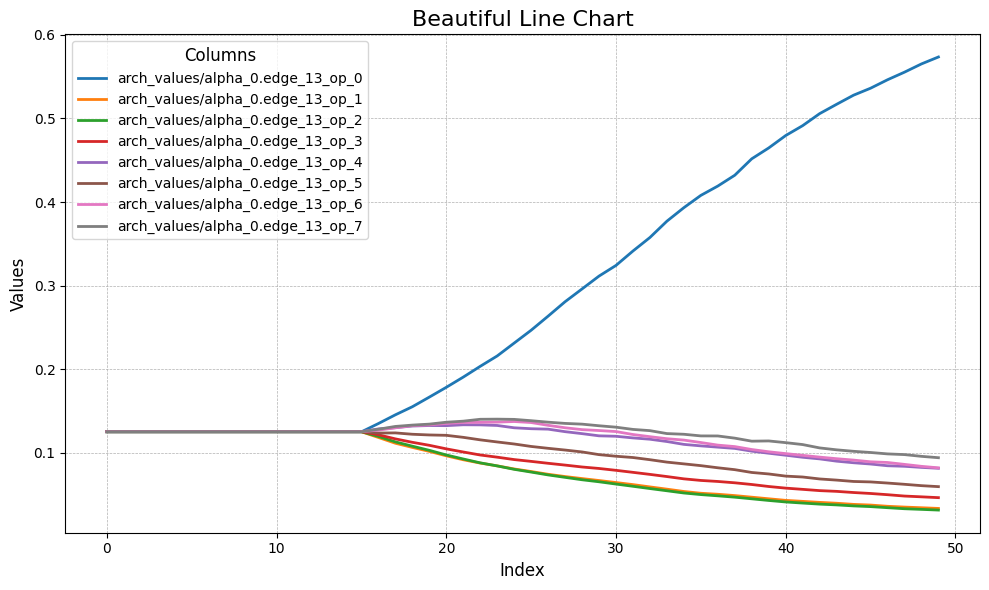

In [5]:
import matplotlib.pyplot as plt

df_ = df[columns]

# Plotting the line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each column as a separate line
for column in df_.columns:
    plt.plot(df_.index, df_[column], label=column, linewidth=2)  # Customize line width

# Add chart title and labels
plt.title("Beautiful Line Chart", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Customize ticks on the x and y axes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend to identify different columns
plt.legend(title="Columns", fontsize=10, title_fontsize=12)

# Add a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()
